In [119]:
import pandas as pd
import numpy as np
from datetime import datetime
import gc
import os
import re
from collections import Counter

from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
matplotlib.use("TkAgg")
%matplotlib inline

# import pandas_profiling

target_lang_list = ["swedish"]

# 각 언어별 처리에 필요한 값들을 데이터프레임 형식으로 작성
lang_data_dict = {
    # 언어 코드
    "code" : {
        "schinese": "zh-cn",
        "english": "en",
        "turkish": "tr",
        "spanish": "es",
        "russian": "ru",
        "koreana": "ko",
        "latam": "la",
        "brazilian": "pt",
        "portuguese": "pt",
        "vietnamese": "vi",
        "polish": "pl",
        "french": "fr",
        "german": "de",
        "hungarian": "hu",
        "ukrainian": "uk",
        "tchinese": "zh-tw",
        "bulgarian": "bg",
        "czech": "cs",
        "italian": "it",
        "thai": "th",
        "greek": "el",
        "dutch": "nl",
        "finnish": "fi",
        "romanian": "ro",
        "japanese": "ja",
        "swedish": "sv",
        "danish": "da",
        "norwegian": "no"
    },
    # 언어 별 폰트
    "font_path" : {
        "schinese": "./font/NotoSansSC-Bold.otf",
        "english": "./font/NotoSans-Bold.ttf",
        "turkish": "./font/NotoSans-Bold.ttf",
        "spanish": "./font/NotoSans-Bold.ttf",
        "russian": "./font/NotoSans-Bold.ttf",
        "koreana": "./font/NotoSansKR-Bold.otf",
        "latam": "./font/NotoSans-Bold.ttf",
        "brazilian": "./font/NotoSans-Bold.ttf",
        "portuguese": "./font/NotoSans-Bold.ttf",
        "vietnamese": "./font/NotoSans-Bold.ttf",
        "polish": "./font/NotoSans-Bold.ttf",
        "french": "./font/NotoSans-Bold.ttf",
        "german": "./font/NotoSans-Bold.ttf",
        "hungarian": "./font/NotoSans-Bold.ttf",
        "ukrainian": "./font/NotoSans-Bold.ttf",
        "tchinese": "./font/NotoSansTC-Bold.otf",
        "bulgarian": "./font/NotoSans-Bold.ttf",
        "czech": "./font/NotoSans-Bold.ttf",
        "italian": "./font/NotoSans-Bold.ttf",
        "thai": "./font/Itim-Regular.ttf",
        "greek": "./font/NotoSans-Bold.ttf",
        "dutch": "./font/NotoSans-Bold.ttf",
        "finnish": "./font/NotoSans-Bold.ttf",
        "romanian": "./font/NotoSans-Bold.ttf",
        "japanese": "./font/NotoSansJP-Bold.otf",
        "swedish": "./font/NotoSans-Bold.ttf",
        "danish": "./font/NotoSans-Bold.ttf",
        "norwegian": "./font/NotoSans-Bold.ttf"
    }, "code" : {
        "schinese": "zh-cn",
        "english": "en",
        "turkish": "tr",
        "spanish": "es",
        "russian": "ru",
        "koreana": "ko",
        "latam": "la",
        "brazilian": "pt",
        "portuguese": "pt",
        "vietnamese": "vi",
        "polish": "pl",
        "french": "fr",
        "german": "de",
        "hungarian": "hu",
        "ukrainian": "uk",
        "tchinese": "zh-tw",
        "bulgarian": "bg",
        "czech": "cs",
        "italian": "it",
        "thai": "th",
        "greek": "el",
        "dutch": "nl",
        "finnish": "fi",
        "romanian": "ro",
        "japanese": "ja",
        "swedish": "sv",
        "danish": "da",
        "norwegian": "no"
    }, "pattern": {
        "schinese": r"",
        "english": r"[\u0041-\u005A\u0061-\u007A]",
        "turkish": r"",
        "spanish": r"",
        "russian": r"",
        "koreana": r"[\uAC00-\uD7AF\u1100-\u11FF]+",
        "latam": r"",
        "brazilian": r"",
        "portuguese": r"",
        "vietnamese": r"",
        "polish": r"",
        "french": r"",
        "german": r"",
        "hungarian": r"",
        "ukrainian": r"",
        "tchinese": r"",
        "bulgarian": r"",
        "czech": r"",
        "italian": r"",
        "thai": r"[\u0E00-\u0E7F]+",
        "greek": r"",
        "dutch": r"",
        "finnish": r"[\u0041-\u005A\u0061-\u007A\u00C5\u00C4\u00D6\u00E5\u00E4\u00F6]",
        "romanian": r"",
        "japanese": r"[\u3040-\u309F\u30A0-\u30FF\u31F0-\u31FF]",
        #"swedish": r"[\u0041-\u005A\u0061-\u007A]",
        "swedish": r"[\u0041-\u005A\u0061-\u007A\u00C5\u00C4\u00D6\u00E5\u00E4\u00F6]",
        "danish": r"",
        "norwegian": r"[\u0041-\u005A\u0061-\u007A\u00C6\u00E6\u00C5\u00E5\u00E5\u00F8\u00D8]"
    }
}

# 원하는 값을 닷 연산자로 직관적으로 접근하기 위한 데이터프레임 생성
lang_data = pd.DataFrame([], columns=lang_data_dict.keys(), index=target_lang_list)

for lang in lang_data.index:
    lang_data.loc[lang] = [lang_data_dict[column][lang] for column in lang_data.columns]

display(lang_data)

,code,font_path,pattern
swedish,sv,./font/NotoSans-Bold.ttf,[\u0041-\u005A\u0061-\u007A\u00C5\u00C4\u00D6\...


In [2]:
import nltk
nltk.__version__

'3.6.5'

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
df = pd.read_csv("./review/swedish.csv", encoding = "utf-8-sig")

display(df)

,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created,quadrant
0,292030,The Witcher 3: Wild Hunt,84866421,swedish,This game is running on potatoes and vodka I n...,True,1610908159,1
1,292030,The Witcher 3: Wild Hunt,84812383,swedish,GOdd,True,1610832051,1
2,292030,The Witcher 3: Wild Hunt,84791354,swedish,grymt spel med bra story och variation,True,1610807708,1
3,292030,The Witcher 3: Wild Hunt,84786009,swedish,"10/10, not more you can wish from an RPG!",True,1610801213,1
4,292030,The Witcher 3: Wild Hunt,84588486,swedish,i really like this game!,True,1610507252,1
...,...,...,...,...,...,...,...,...
119879,9900,Star Trek Online,8766864,swedish,download this game make it so,True,1390129478,2
119880,9900,Star Trek Online,8632905,swedish,det är hm hm jättebra hehehe,True,1389279744,2
119881,9900,Star Trek Online,8174142,swedish,går inte och spela,False,1387650067,3
119882,9900,Star Trek Online,8020968,swedish,I higlily Recomned this Game as I do Love Star...,True,1386879346,2


In [11]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\03_13\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\03_13\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords
stopwords.words("swedish")[:10]

['och', 'det', 'att', 'i', 'en', 'jag', 'hon', 'som', 'han', 'på']

In [94]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\03_13\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [122]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
tokenizer = TreebankWordTokenizer()

review = "det är hm hm jättebra hehehe"
review = review.lower()
trash = re.compile(r"[\u0021-\u0039]")
review = trash.sub("", review)

stop_swe = set(stopwords.words("swedish"))
#stop_eng = set(stopwords.words("english"))

token_list = tokenizer.tokenize(review)

#print(token_list)

tokens = []
for token in token_list:
    token = "".join(re.findall(lang_data.pattern.swedish, token))
    #print(token)
    tokens.append(token)
        
    
result = []

for w in tokens:
    if w not in stop_swe and w not in stop_eng:
        result.append(w)
        
#result = [lm.lemmatize(w, pos="v") for w in result]

tagged_list = pos_tag(result)

print(tagged_list)

nouns_list = [t[0] for t in tagged_list if t[1] == "NN" or t[1] == "NNS" or t[1] == "VBG" or t[1] == "JJ"]

nouns_list

#review = re.findall(lang_data.pattern.swedish, review)


#stop_swe = set(stopwords.words("swedish"))
#stop_eng = set(stopwords.words("english"))

#token_list = tokenizer.tokenize(review)

#result = []

#for w in token_list:
 #   if w not in stop_swe and w not in stop_eng:
  #      result.append(w)
        

#print(token_list)
#print(result)
      
#review = " ".join(re.findall(lang_data.pattern.swedish, str(review)))
#token_list = nltk.word_tokenize(review)
#print(token_list)




[('hm', 'NN'), ('hm', 'NN'), ('jättebra', 'NN'), ('hehehe', 'NN')]


['hm', 'hm', 'jättebra', 'hehehe']

In [36]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\03_13\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [44]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

stemming = [lemmatizer.lemmatize(w) for w in result]
print(stemming)

['Good', 'soundtrack', 'good', 'story', 'good', 'graphic', 'good', 'ending', 'Would', 'give']


In [123]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()

test_df = df.copy()
display(test_df)

def preprocess_swedish(review):
    review = str(review)
    review = review.lower()
    
    trash = re.compile(r"[\u0021-\u0039]")
    review = trash.sub("", review)

    stop_swe = set(stopwords.words("swedish"))
    stop_eng = set(stopwords.words("english"))

    token_list = tokenizer.tokenize(review)

    #print(token_list)

    tokens = []
    for token in token_list:
        token = "".join(re.findall(lang_data.pattern.swedish, token))
        #print(token)
        tokens.append(token)
        
    
    result = []

    for w in tokens:
        if w not in stop_swe and w not in stop_eng:
            result.append(w)
        
    #result = [lm.lemmatize(w, pos="v") for w in result]

    tagged_list = pos_tag(result)
    
    #print(tagged_list)

    nouns_list = [t[0] for t in tagged_list if t[1] == "NN" or t[1] == "NNS" or t[1] == "VBG" or t[1] == "JJ"]
    
    if nouns_list:
        return " ".join(nouns_list)
    else:
        return np.nan
 

test_df["review"] = test_df[["review"]].apply(
    lambda x: preprocess_swedish(x["review"]), axis=1
)

# 필터링 결과가 결측치인 행 제거
test_df = test_df.dropna(axis=0, how="any")

display(test_df)

,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created,quadrant
0,292030,The Witcher 3: Wild Hunt,84866421,swedish,This game is running on potatoes and vodka I n...,True,1610908159,1
1,292030,The Witcher 3: Wild Hunt,84812383,swedish,GOdd,True,1610832051,1
2,292030,The Witcher 3: Wild Hunt,84791354,swedish,grymt spel med bra story och variation,True,1610807708,1
3,292030,The Witcher 3: Wild Hunt,84786009,swedish,"10/10, not more you can wish from an RPG!",True,1610801213,1
4,292030,The Witcher 3: Wild Hunt,84588486,swedish,i really like this game!,True,1610507252,1
...,...,...,...,...,...,...,...,...
119879,9900,Star Trek Online,8766864,swedish,download this game make it so,True,1390129478,2
119880,9900,Star Trek Online,8632905,swedish,det är hm hm jättebra hehehe,True,1389279744,2
119881,9900,Star Trek Online,8174142,swedish,går inte och spela,False,1387650067,3
119882,9900,Star Trek Online,8020968,swedish,I higlily Recomned this Game as I do Love Star...,True,1386879346,2


,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created,quadrant
0,292030,The Witcher 3: Wild Hunt,84866421,swedish,game running potatoes vodka,True,1610908159,1
1,292030,The Witcher 3: Wild Hunt,84812383,swedish,godd,True,1610832051,1
2,292030,The Witcher 3: Wild Hunt,84791354,swedish,grymt spel bra story variation,True,1610807708,1
3,292030,The Witcher 3: Wild Hunt,84786009,swedish,wish rpg,True,1610801213,1
4,292030,The Witcher 3: Wild Hunt,84588486,swedish,like game,True,1610507252,1
...,...,...,...,...,...,...,...,...
119879,9900,Star Trek Online,8766864,swedish,download game,True,1390129478,2
119880,9900,Star Trek Online,8632905,swedish,hm hm jättebra hehehe,True,1389279744,2
119881,9900,Star Trek Online,8174142,swedish,går spela,False,1387650067,3
119882,9900,Star Trek Online,8020968,swedish,game love star trek movies series space fighti...,True,1386879346,2


In [125]:
sd_text = " ".join(test_df["review"].tolist())
sd_text_counter = Counter(sd_text.split(" "))

display(sd_text_counter.most_common(10))

[('game', 52964),
 ('good', 20367),
 ('fun', 12980),
 ('spel', 11932),
 ('bra', 10470),
 ('', 9457),
 ('nice', 7077),
 ('great', 6012),
 ('play', 5345),
 ('spelet', 5120)]

In [129]:
stopword_list = ["game", "", "spel", "games", "fun", "nice", "great", "bra", "dont", "yes"]

for stopword in stopword_list:
    if stopword in sd_text_counter.keys():
        del sd_text_counter[stopword]

display(sd_text_counter.most_common(10))

[('good', 20367),
 ('play', 5345),
 ('spelet', 5120),
 ('roligt', 4250),
 ('time', 4037),
 ('kul', 3616),
 ('story', 3013),
 ('friends', 2765),
 ('hours', 2495),
 ('playing', 2355)]

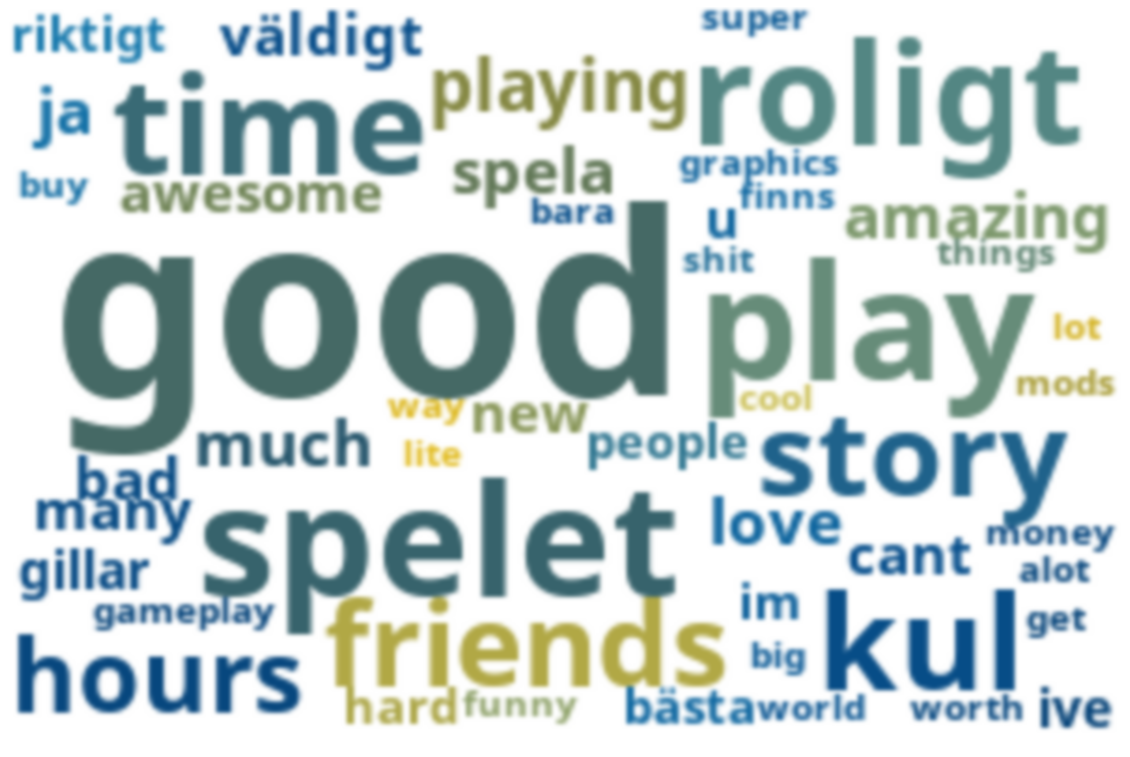

In [131]:
flag = Image.open(f"swedish.png")
mask = np.array(flag)

wc = WordCloud(font_path=lang_data.font_path.swedish, prefer_horizontal=1.0,
               background_color="rgb(255,255,255)", mask=mask, color_func=ImageColorGenerator(mask),
               min_font_size = 10,
               max_words=200, width=2560, height=1707).generate_from_frequencies(sd_text_counter) 

plt.figure(figsize=(20,20))

plt.imshow(wc, interpolation="bicubic")
plt.axis("off")
plt.show()